# LinkedIn Posts Data Analysis
## Notebook 02: Exploratory Data Analysis (EDA)

This notebook performs comprehensive exploratory data analysis on the cleaned LinkedIn posts dataset.

### Objectives:
1. Generate descriptive statistics
2. Analyze engagement metric distributions
3. Explore correlations between features
4. Compare content types
5. Analyze text features
6. Identify top performers
7. Examine temporal patterns
8. Generate insights for deeper analysis

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy import stats
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Configure pandas display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', None)
pd.set_option('display.float_format', lambda x: f'{x:.2f}')

print("Libraries imported successfully!")

Libraries imported successfully!


## 1. Load Cleaned Data

In [2]:
# Load cleaned dataset
df = pd.read_csv('../output/tables/linkedin_posts_cleaned.csv')

# Parse datetime column (handle mixed formats)
df['postedAt'] = pd.to_datetime(df['postedAt'], format='mixed', utc=True)

print(f"Dataset loaded successfully!")
print(f"Shape: {df.shape}")
print(f"Date range: {df['postedAt'].min()} to {df['postedAt'].max()}")

Dataset loaded successfully!
Shape: (11227, 73)
Date range: 2024-11-22 00:27:05.461000+00:00 to 2025-11-22 22:22:05.035000+00:00


In [3]:
# Quick preview
df.head()

urn  \
0  urn:li:activity:7397317909485637633   
1  urn:li:activity:7397314179881263104   
2  urn:li:activity:7396955452682563585   
3  urn:li:activity:7396593064259051520   
4  urn:li:activity:7396361475256180737   

                                                 url     type  \
0  https://www.linkedin.com/posts/timothydraper_i...    image   
1  https://www.linkedin.com/posts/andytangvc_anot...    image   
2  https://www.linkedin.com/posts/timothydraper_t...    image   
3  https://www.linkedin.com/posts/timothydraper_f...    image   
4  https://www.linkedin.com/posts/andytangvc_why-...  article   

                                                text  isActivity  \
0  I loved Brian Armstrong from the moment he wal...       False   
1  Another great demo day from Draper University!...        True   
2  Tom Williams came to us with no business plan....       False   
3  Fresh off our big win with Twitch being bought...       False   
4  As a trained engineer (and recovering biology ...        True   

  timeSincePosted                            shareUrn  \
0              2d    urn:li:share:7397317905568317440   
1              2d  urn:li:ugcPost:7397313732470722560   
2              3d    urn:li:share:7396955451696832512   
3              4d    urn:li:share:7396593053609807873   
4              5d    urn:li:share:7396184167715201024   

                postedAtISO  postedAtTimestamp  numLikes  numShares  \
0  2025-11-20T17:00:25.142Z      1763658025142       128          3   
1  2025-11-20T16:45:35.935Z      1763657135935       195          7   
2  2025-11-19T17:00:08.706Z      1763571608706       239          7   
3  2025-11-18T17:00:08.573Z      1763485208573       115          4   
4  2025-11-18T01:39:53.452Z      1763429993452        59          4   

   numComments  canReact  canPostComments  canShare  commentingDisabled  \
0           13      True             True      True               False   
1           14      True             True      True               False   
2           24      True             True      True               False   
3            5      True             True      True               False   
4            3      True             True      True               False   

   rootShare  authorName authorProfileId authorType  \
0       True  Tim Draper   timothydraper     Person   
1       True   Andy Tang      andytangvc     Person   
2       True  Tim Draper   timothydraper     Person   
3       True  Tim Draper   timothydraper     Person   
4       True   Andy Tang      andytangvc     Person   

                                      authorHeadline  \
0  Funding the future first | Founder at Draper A...   
1  Partner, Draper Associates | Founding partner,...   
2  Funding the future first | Founder at Draper A...   
3  Funding the future first | Founder at Draper A...   
4  Partner, Draper Associates | Founding partner,...   

                                    authorProfileUrl  \
0  https://www.linkedin.com/in/timothydraper?mini...   
1  https://www.linkedin.com/in/andytangvc?miniPro...   
2  https://www.linkedin.com/in/timothydraper?mini...   
3  https://www.linkedin.com/in/timothydraper?mini...   
4  https://www.linkedin.com/in/andytangvc?miniPro...   

                                authorProfilePicture             authorUrn  \
0  https://media.licdn.com/dms/image/v2/D5603AQHr...  urn:li:member:177619   
1  https://media.licdn.com/dms/image/v2/D5603AQF3...   urn:li:member:65972   
2  https://media.licdn.com/dms/image/v2/D5603AQHr...  urn:li:member:177619   
3  https://media.licdn.com/dms/image/v2/D5603AQHr...  urn:li:member:177619   
4  https://media.licdn.com/dms/image/v2/D5603AQF3...   urn:li:member:65972   

   authorFollowersCount  has_images  has_video  has_article  has_document  \
0                   NaN        True      False        False         False   
1                   NaN        True      False        False         False   
2                   NaN        True      False        Fa

## 2. Overall Dataset Statistics

In [4]:
# Descriptive statistics for numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
desc_stats = df[numeric_cols].describe()
desc_stats

postedAtTimestamp  numLikes  numShares  numComments  \
count           11227.00  11227.00   11227.00     11227.00   
mean    1749295103930.75    287.19      13.64        26.84   
std        9005391213.67    781.15      71.35       109.37   
min     1732235225461.00      0.00       0.00         0.00   
25%     1741770630493.50     40.00       1.00         2.00   
50%     1749575106377.00    100.00       3.00         7.00   
75%     1757477450318.00    258.00      10.00        23.00   
max     1763850125035.00  20685.00    4235.00      9556.00   

       authorFollowersCount  num_images  num_comments_fetched  \
count               1146.00    11227.00              11227.00   
mean              256473.97        0.52                  0.00   
std              1124295.73        1.14                  0.00   
min                   34.00        0.00                  0.00   
25%                 7558.00        0.00                  0.00   
50%                29949.00        0.00                  0.00   
75%               180937.00        1.00                  0.00   
max             19371999.00       20.00                  0.00   

       num_reactions_fetched  num_attributes     author_id  text_length  \
count               11227.00        11227.00      10064.00     11227.00   
mean                    0.00            3.44  123136013.40       714.13   
std                     0.00            5.83  174684470.69       628.51   
min                     0.00            0.00       1213.00         0.00   
25%                     0.00            0.00    3019349.00       254.00   
50%                     0.00            1.00   50967689.00       513.00   
75%                     0.00            4.00  172821683.00      1006.00   
max                     0.00           40.00 1465469236.00      3000.00   

       word_count  line_count  hashtag_count  url_count  emoji_count  \
count    11227.00    11227.00       11227.00   11227.00     11227.00   
mean       115.71       10.10           0.73       0.64         0.64   
std        102.69       10.99           2.10       3.07         1.52   
min          0.00        1.00           0.00       0.00         0.00   
25%         41.00        3.00           0.00       0.00         0.00   
50%         83.00        7.00           0.00       0.00         0.00   
75%        160.00       13.00           0.00       1.00         1.00   
max        572.00      106.00          26.00      53.00        32.00   

       total_engagement  engagement_score  comment_to_like_ratio  \
count          11227.00          11227.00               11227.00   
mean             327.67            381.79                   0.10   
std              886.62           1058.85                   0.17   
min                0.00              0.00                   0.00   
25%               45.00             52.00                   0.03   
50%              115.00            133.00                   0.07   
75%              294.00            343.00                   0.12   
max            26120.00          35790.00                   4.71   

       share_to_like_ratio  engagement_per_follower  post_year  post_month  \
count             11227.00                  1146.00   11227.00    11227.00   
mean                  0.05                     0.02    2024.92        6.61   
std                   0.06                     0.05       0.27        3.34   
min                   0.00                     0.00    2024.00        1.00   
25%                   0.01                     0.00    2025.00        4.00   
50%                   0.03                     0.00    2025.00        7.00   
75%                   0.06                     0.01    2025.00       10.00   
max                   1.50                     0.91    2025.00       12.00   

       post_day  post_hour  post_dayofweek  post_quarter  
count  11227.00   11227.00        11227.00      11227.00  
mean      15.73      14.34            2.29          2.54  
std        8.73       5.96            1.59  

In [5]:
# Key metrics summary
print("="*70)
print("KEY METRICS SUMMARY")
print("="*70)

metrics = {
    'Total Posts': len(df),
    'Unique Authors': df['authorName'].nunique(),
    'Total Likes': df['numLikes'].sum(),
    'Total Shares': df['numShares'].sum(),
    'Total Comments': df['numComments'].sum(),
    'Total Engagement': df['total_engagement'].sum(),
    'Avg Engagement per Post': df['total_engagement'].mean(),
    'Median Engagement per Post': df['total_engagement'].median(),
    'Posts with Images': df['has_images'].sum(),
    'Posts with Videos': df['has_video'].sum(),
    'Posts with Articles': df['has_article'].sum(),
    'Reshared Posts': df['is_reshare'].sum(),
}

for key, value in metrics.items():
    if isinstance(value, float):
        print(f"{key:.<50} {value:,.2f}")
    else:
        print(f"{key:.<50} {value:,}")
print("="*70)

KEY METRICS SUMMARY
Total Posts....................................... 11,227
Unique Authors.................................... 1,829
Total Likes....................................... 3,224,247
Total Shares...................................... 153,186
Total Comments.................................... 301,286
Total Engagement.................................. 3,678,719
Avg Engagement per Post........................... 327.67
Median Engagement per Post........................ 115.00
Posts with Images................................. 3,970
Posts with Videos................................. 1,620
Posts with Articles............................... 1,625
Reshared Posts.................................... 2,405


In [6]:
# Save summary statistics
summary_df = pd.DataFrame(list(metrics.items()), columns=['Metric', 'Value'])
summary_df.to_csv('../output/tables/summary_statistics.csv', index=False)
print("Summary statistics saved to: ../output/tables/summary_statistics.csv")

Summary statistics saved to: ../output/tables/summary_statistics.csv


## 3. Engagement Metrics Distribution

### 3.1 Distribution Visualizations

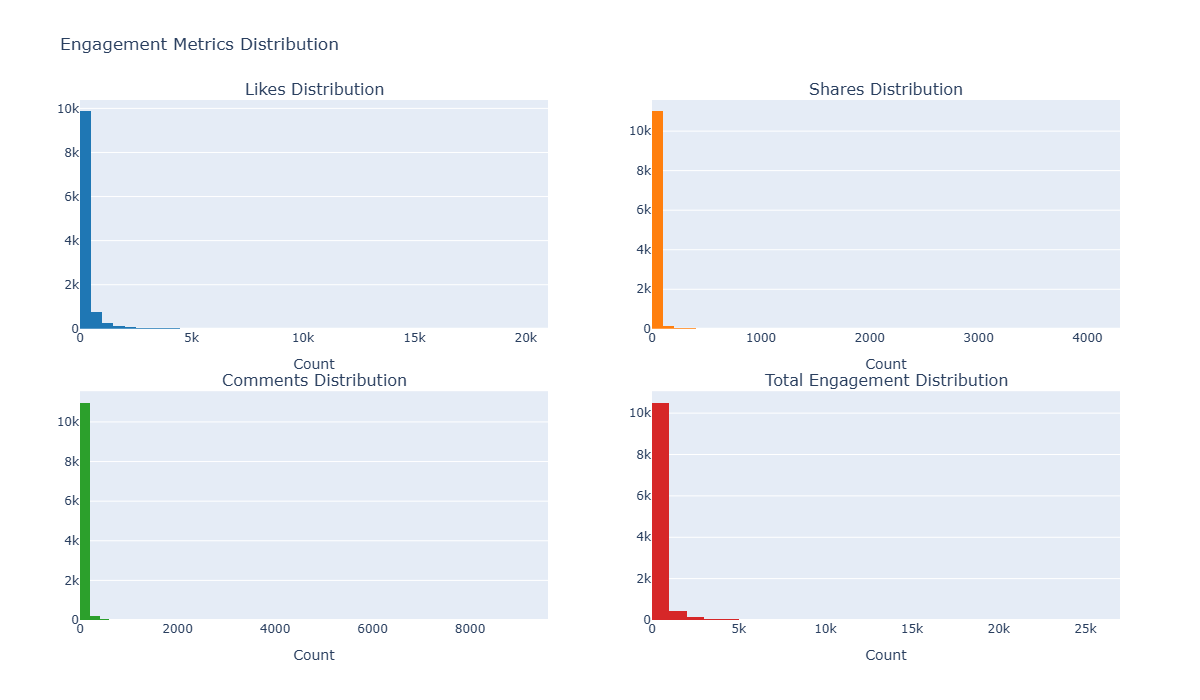

In [7]:
# Create 2x2 subplot for engagement distributions
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=('Likes Distribution', 'Shares Distribution', 
                    'Comments Distribution', 'Total Engagement Distribution'),
    vertical_spacing=0.12,
    horizontal_spacing=0.1
)

# Likes
fig.add_trace(
    go.Histogram(x=df['numLikes'], name='Likes', marker_color='#1f77b4', nbinsx=50),
    row=1, col=1
)

# Shares
fig.add_trace(
    go.Histogram(x=df['numShares'], name='Shares', marker_color='#ff7f0e', nbinsx=50),
    row=1, col=2
)

# Comments
fig.add_trace(
    go.Histogram(x=df['numComments'], name='Comments', marker_color='#2ca02c', nbinsx=50),
    row=2, col=1
)

# Total Engagement
fig.add_trace(
    go.Histogram(x=df['total_engagement'], name='Total', marker_color='#d62728', nbinsx=50),
    row=2, col=2
)

fig.update_layout(
    title_text='Engagement Metrics Distribution',
    height=700,
    showlegend=False
)

fig.update_xaxes(title_text='Count', row=1, col=1)
fig.update_xaxes(title_text='Count', row=1, col=2)
fig.update_xaxes(title_text='Count', row=2, col=1)
fig.update_xaxes(title_text='Count', row=2, col=2)

fig.show()

# Display static image for GitHub preview
from IPython.display import Image, display
import plotly.io as pio
try:
    img_bytes = pio.to_image(fig, format="png", width=1200, height=700)
    display(Image(img_bytes))
except Exception as e:
    print("Install kaleido: pip install kaleido")
fig.write_html('../output/figures/engagement_distributions.html')

### 3.2 Box Plots for Outlier Detection

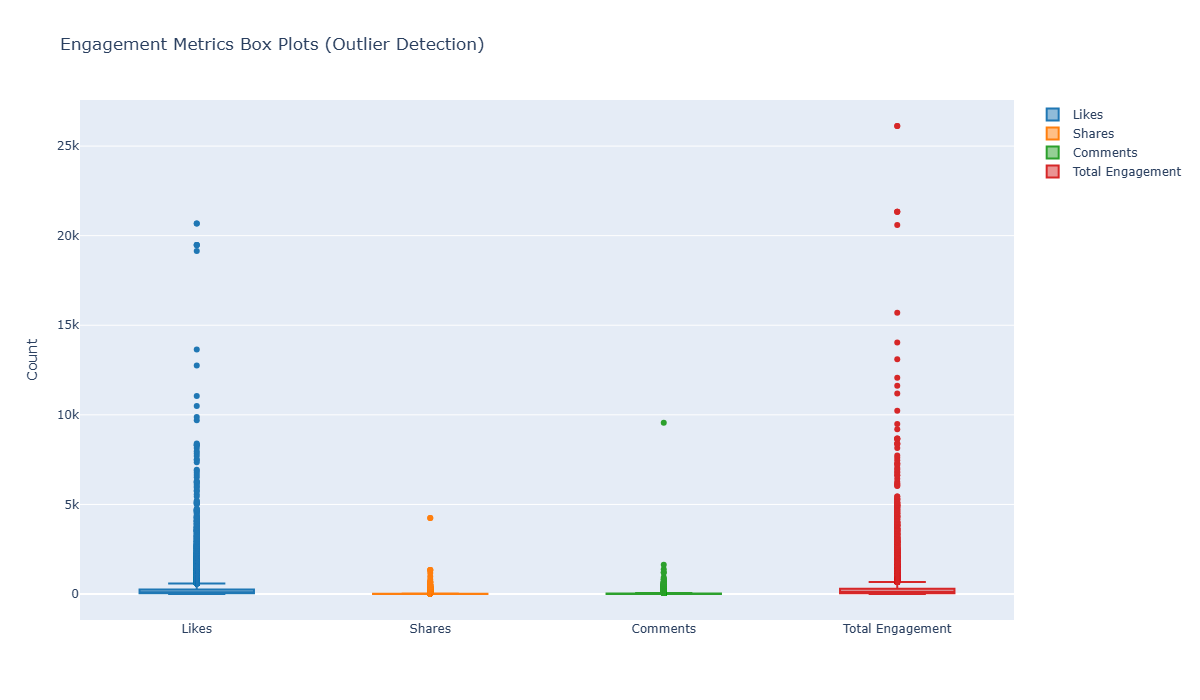

In [8]:
# Create box plots for engagement metrics
fig = go.Figure()

fig.add_trace(go.Box(y=df['numLikes'], name='Likes', marker_color='#1f77b4'))
fig.add_trace(go.Box(y=df['numShares'], name='Shares', marker_color='#ff7f0e'))
fig.add_trace(go.Box(y=df['numComments'], name='Comments', marker_color='#2ca02c'))
fig.add_trace(go.Box(y=df['total_engagement'], name='Total Engagement', marker_color='#d62728'))

fig.update_layout(
    title='Engagement Metrics Box Plots (Outlier Detection)',
    yaxis_title='Count',
    height=600,
    showlegend=True
)

fig.show()

# Display static image for GitHub preview
from IPython.display import Image, display
import plotly.io as pio
try:
    img_bytes = pio.to_image(fig, format="png", width=1200, height=700)
    display(Image(img_bytes))
except Exception as e:
    print("Install kaleido: pip install kaleido")
fig.write_html('../output/figures/engagement_boxplots.html')

In [9]:
# Identify top performers (outliers)
print("Top 10 Posts by Total Engagement:")
top_posts = df.nlargest(10, 'total_engagement')[[
    'authorName', 'text', 'numLikes', 'numShares', 'numComments', 
    'total_engagement', 'primary_content_type'
]]
print(top_posts.to_string())

# Save top posts
top_posts.to_csv('../output/tables/top_10_posts_by_engagement.csv', index=False)

Top 10 Posts by Total Engagement:
                authorName                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

### 3.3 Engagement Statistics

In [10]:
# Calculate skewness and kurtosis
engagement_cols = ['numLikes', 'numShares', 'numComments', 'total_engagement']

stats_df = pd.DataFrame({
    'Metric': engagement_cols,
    'Mean': [df[col].mean() for col in engagement_cols],
    'Median': [df[col].median() for col in engagement_cols],
    'Std': [df[col].std() for col in engagement_cols],
    'Skewness': [df[col].skew() for col in engagement_cols],
    'Kurtosis': [df[col].kurtosis() for col in engagement_cols],
    'Q1': [df[col].quantile(0.25) for col in engagement_cols],
    'Q3': [df[col].quantile(0.75) for col in engagement_cols],
})

print("\nEngagement Metrics Statistical Summary:")
print(stats_df.to_string(index=False))

stats_df.to_csv('../output/tables/engagement_statistics.csv', index=False)


Engagement Metrics Statistical Summary:
          Metric   Mean  Median    Std  Skewness  Kurtosis    Q1     Q3
        numLikes 287.19  100.00 781.15     12.60    249.37 40.00 258.00
       numShares  13.64    3.00  71.35     40.29   2229.68  1.00  10.00
     numComments  26.84    7.00 109.37     60.38   5145.55  2.00  23.00
total_engagement 327.67  115.00 886.62     13.10    274.37 45.00 294.00


## 4. Correlation Analysis

### 4.1 Correlation Heatmap

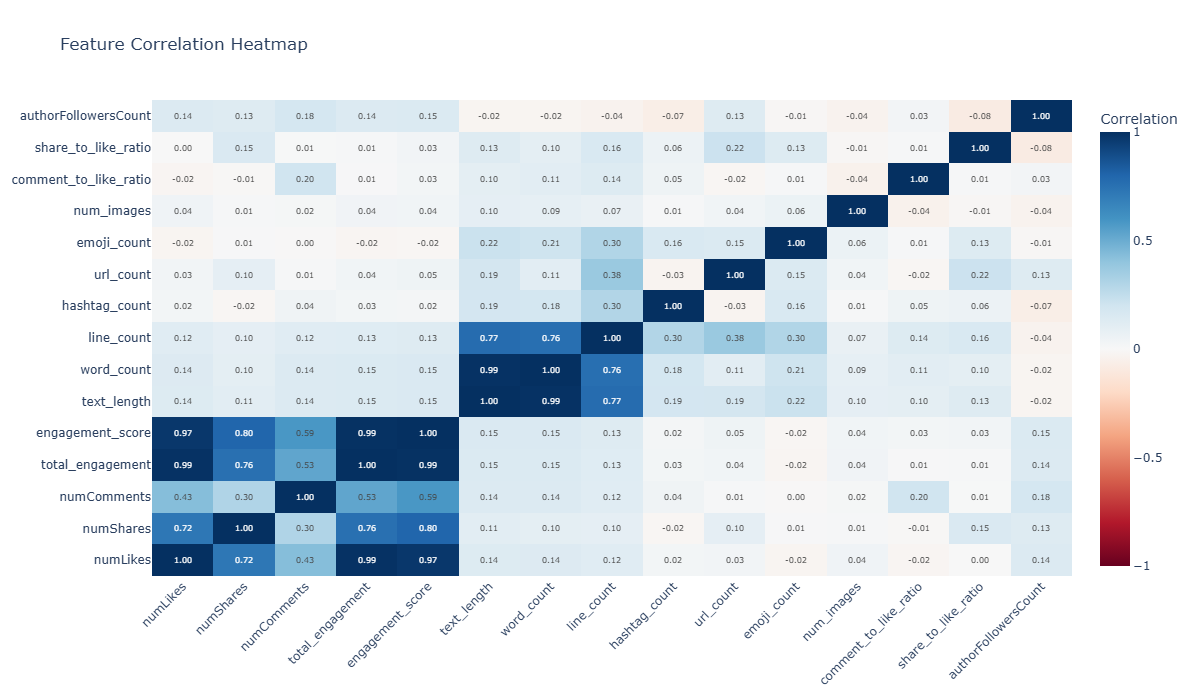

In [11]:
# Select numeric features for correlation
corr_features = [
    'numLikes', 'numShares', 'numComments', 'total_engagement', 'engagement_score',
    'text_length', 'word_count', 'line_count', 'hashtag_count', 'url_count', 'emoji_count',
    'num_images', 'comment_to_like_ratio', 'share_to_like_ratio'
]

# Add follower count if available
if df['authorFollowersCount'].notna().sum() > 100:
    corr_features.append('authorFollowersCount')

# Calculate correlation matrix
corr_matrix = df[corr_features].corr()

# Create interactive heatmap
fig = go.Figure(data=go.Heatmap(
    z=corr_matrix.values,
    x=corr_matrix.columns,
    y=corr_matrix.columns,
    colorscale='RdBu',
    zmid=0,
    text=corr_matrix.values,
    texttemplate='%{text:.2f}',
    textfont={"size": 8},
    colorbar=dict(title="Correlation")
))

fig.update_layout(
    title='Feature Correlation Heatmap',
    width=1000,
    height=900,
    xaxis_tickangle=-45
)

fig.show()

# Display static image for GitHub preview
from IPython.display import Image, display
import plotly.io as pio
try:
    img_bytes = pio.to_image(fig, format="png", width=1200, height=700)
    display(Image(img_bytes))
except Exception as e:
    print("Install kaleido: pip install kaleido")
fig.write_html('../output/figures/correlation_heatmap.html')

# Save correlation matrix
corr_matrix.to_csv('../output/tables/correlation_matrix.csv')

In [12]:
# Find strongest correlations with total engagement
engagement_corr = corr_matrix['total_engagement'].sort_values(ascending=False)
print("\nCorrelation with Total Engagement:")
print(engagement_corr)


Correlation with Total Engagement:
total_engagement         1.00
engagement_score         0.99
numLikes                 0.99
numShares                0.76
numComments              0.53
word_count               0.15
text_length              0.15
authorFollowersCount     0.14
line_count               0.13
num_images               0.04
url_count                0.04
hashtag_count            0.03
share_to_like_ratio      0.01
comment_to_like_ratio    0.01
emoji_count             -0.02
Name: total_engagement, dtype: float64


### 4.2 Scatter Matrix for Key Features

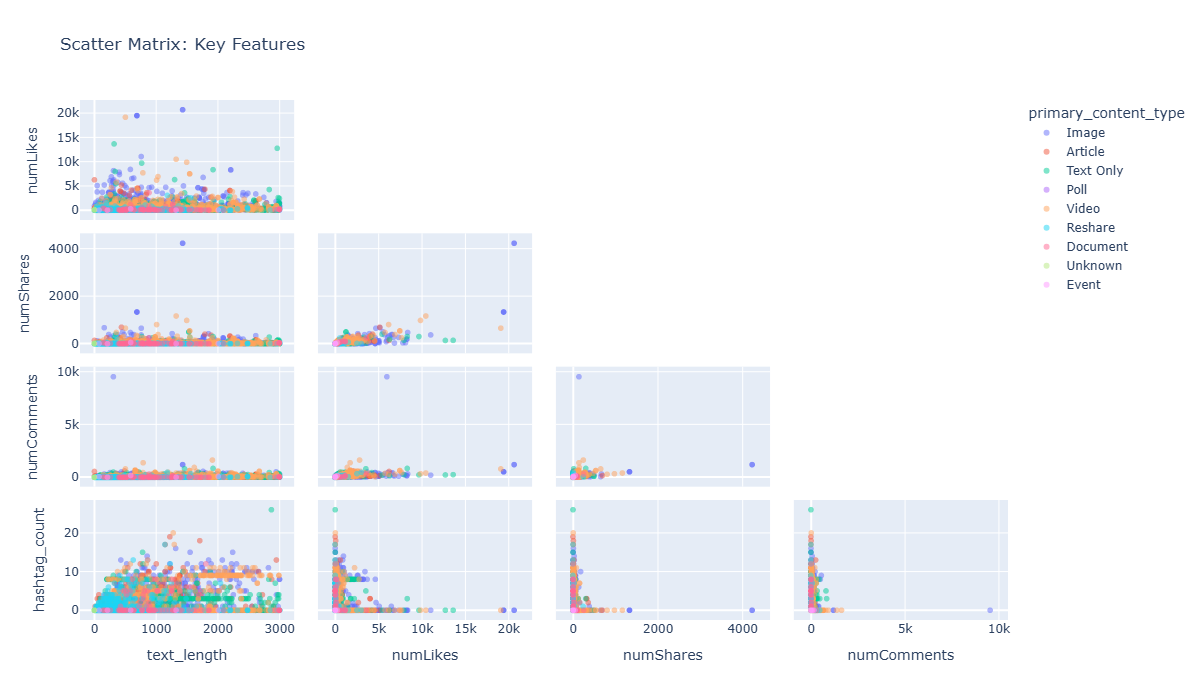

In [13]:
# Create scatter matrix for key features
scatter_features = ['text_length', 'numLikes', 'numShares', 'numComments', 'hashtag_count']

fig = px.scatter_matrix(
    df,
    dimensions=scatter_features,
    color='primary_content_type',
    title='Scatter Matrix: Key Features',
    height=900,
    opacity=0.5
)

fig.update_traces(diagonal_visible=False, showupperhalf=False)
fig.show()

# Display static image for GitHub preview
from IPython.display import Image, display
import plotly.io as pio
try:
    img_bytes = pio.to_image(fig, format="png", width=1200, height=700)
    display(Image(img_bytes))
except Exception as e:
    print("Install kaleido: pip install kaleido")
fig.write_html('../output/figures/scatter_matrix.html')

## 5. Content Type Analysis

### 5.1 Content Type Distribution

Content Type Distribution:
Content Type  Count  Percentage
       Image   3970       35.36
     Reshare   2405       21.42
     Article   1625       14.47
       Video   1620       14.43
   Text Only   1489       13.26
    Document     84        0.75
        Poll     26        0.23
       Event      5        0.04
     Unknown      3        0.03


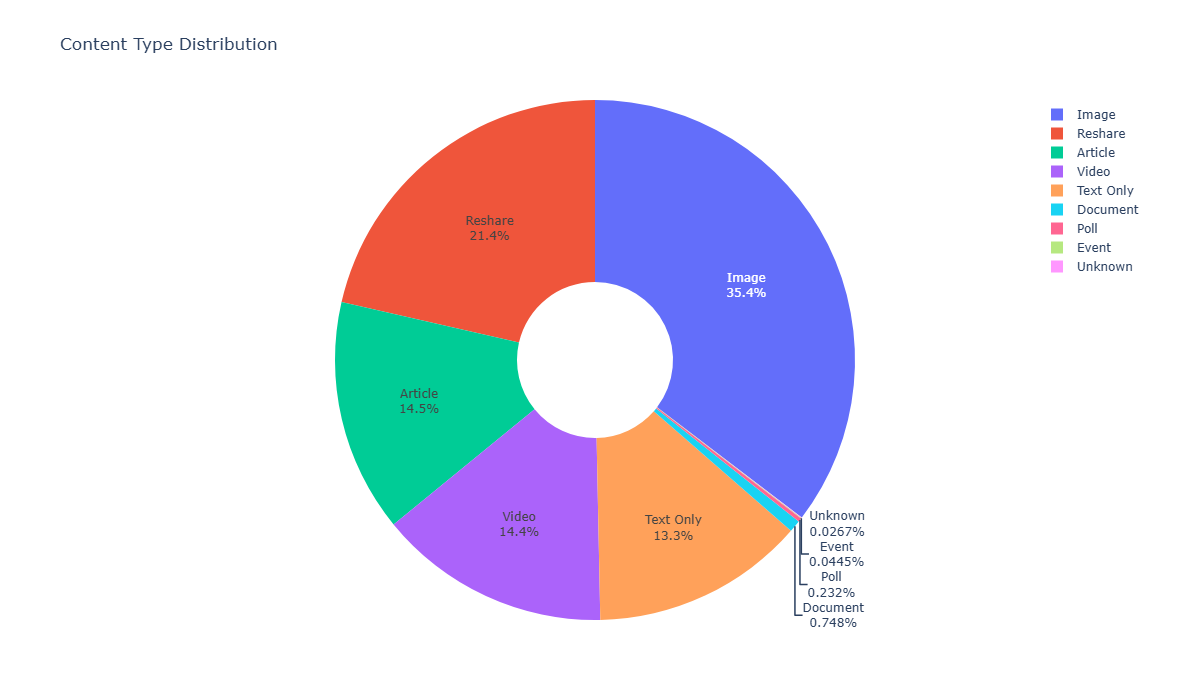

In [14]:
# Content type distribution
content_dist = df['primary_content_type'].value_counts().reset_index()
content_dist.columns = ['Content Type', 'Count']
content_dist['Percentage'] = (content_dist['Count'] / len(df) * 100).round(2)

print("Content Type Distribution:")
print(content_dist.to_string(index=False))

# Create pie chart
fig = px.pie(
    content_dist,
    values='Count',
    names='Content Type',
    title='Content Type Distribution',
    hover_data=['Percentage'],
    hole=0.3
)

fig.update_traces(textposition='auto', textinfo='percent+label')
fig.update_layout(height=600)
fig.show()

# Display static image for GitHub preview
from IPython.display import Image, display
import plotly.io as pio
try:
    img_bytes = pio.to_image(fig, format="png", width=1200, height=700)
    display(Image(img_bytes))
except Exception as e:
    print("Install kaleido: pip install kaleido")
fig.write_html('../output/figures/content_type_distribution_pie.html')

### 5.2 Engagement by Content Type

In [15]:
# Calculate average engagement by content type
content_engagement = df.groupby('primary_content_type').agg({
    'numLikes': ['mean', 'median', 'sum'],
    'numShares': ['mean', 'median', 'sum'],
    'numComments': ['mean', 'median', 'sum'],
    'total_engagement': ['mean', 'median', 'sum'],
    'urn': 'count'
}).round(2)

content_engagement.columns = ['_'.join(col) for col in content_engagement.columns]
content_engagement = content_engagement.rename(columns={'urn_count': 'post_count'})
content_engagement = content_engagement.sort_values('total_engagement_mean', ascending=False)

print("\nEngagement by Content Type:")
print(content_engagement)

content_engagement.to_csv('../output/tables/engagement_by_content_type.csv')


Engagement by Content Type:
                      numLikes_mean  numLikes_median  numLikes_sum  \
primary_content_type                                                 
Video                        389.02           165.00        630208   
Image                        397.32           153.00       1577355   
Text Only                    344.39           139.00        512797   
Article                      220.03            99.00        357556   
Document                     209.49            68.00         17597   
Event                         78.40            27.00           392   
Unknown                       85.00           127.00           255   
Reshare                       53.01            29.00        127486   
Poll                          23.12            15.00           601   

                      numShares_mean  numShares_median  numShares_sum  \
primary_content_type                                                    
Video                          25.93              8.00

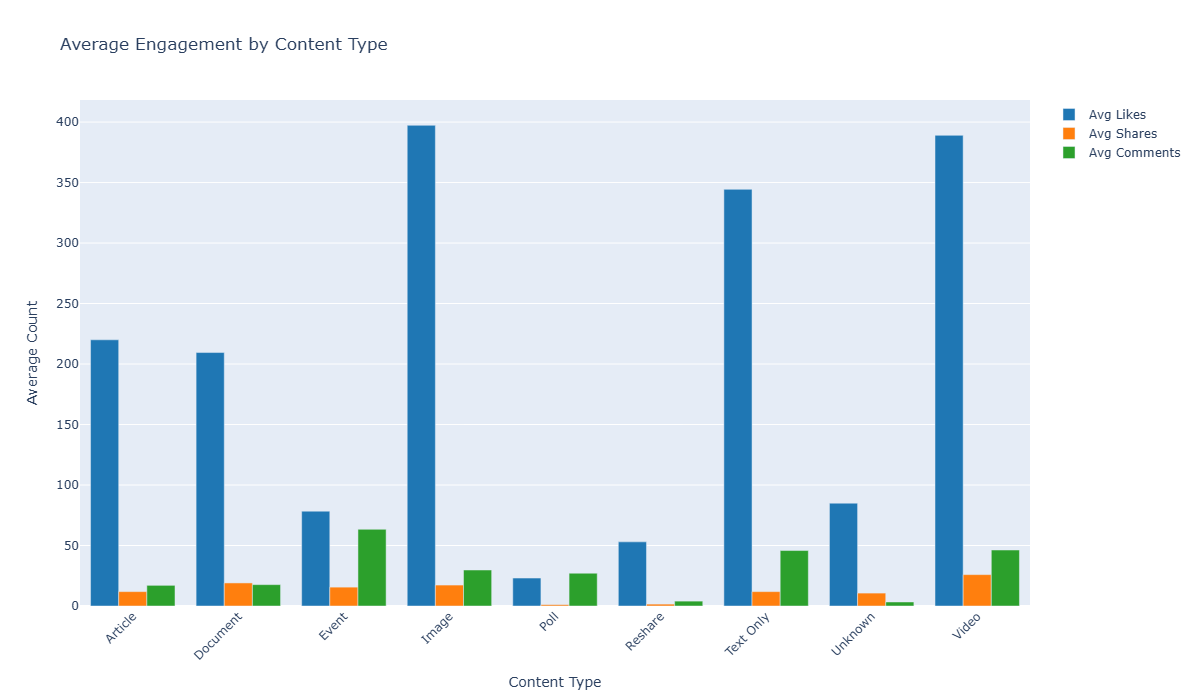

In [16]:
# Create grouped bar chart
content_summary = df.groupby('primary_content_type').agg({
    'numLikes': 'mean',
    'numShares': 'mean',
    'numComments': 'mean'
}).round(2).reset_index()

fig = go.Figure()

fig.add_trace(go.Bar(
    x=content_summary['primary_content_type'],
    y=content_summary['numLikes'],
    name='Avg Likes',
    marker_color='#1f77b4'
))

fig.add_trace(go.Bar(
    x=content_summary['primary_content_type'],
    y=content_summary['numShares'],
    name='Avg Shares',
    marker_color='#ff7f0e'
))

fig.add_trace(go.Bar(
    x=content_summary['primary_content_type'],
    y=content_summary['numComments'],
    name='Avg Comments',
    marker_color='#2ca02c'
))

fig.update_layout(
    title='Average Engagement by Content Type',
    xaxis_title='Content Type',
    yaxis_title='Average Count',
    barmode='group',
    height=600,
    xaxis_tickangle=-45
)

fig.show()

# Display static image for GitHub preview
from IPython.display import Image, display
import plotly.io as pio
try:
    img_bytes = pio.to_image(fig, format="png", width=1200, height=700)
    display(Image(img_bytes))
except Exception as e:
    print("Install kaleido: pip install kaleido")
fig.write_html('../output/figures/engagement_by_content_type.html')

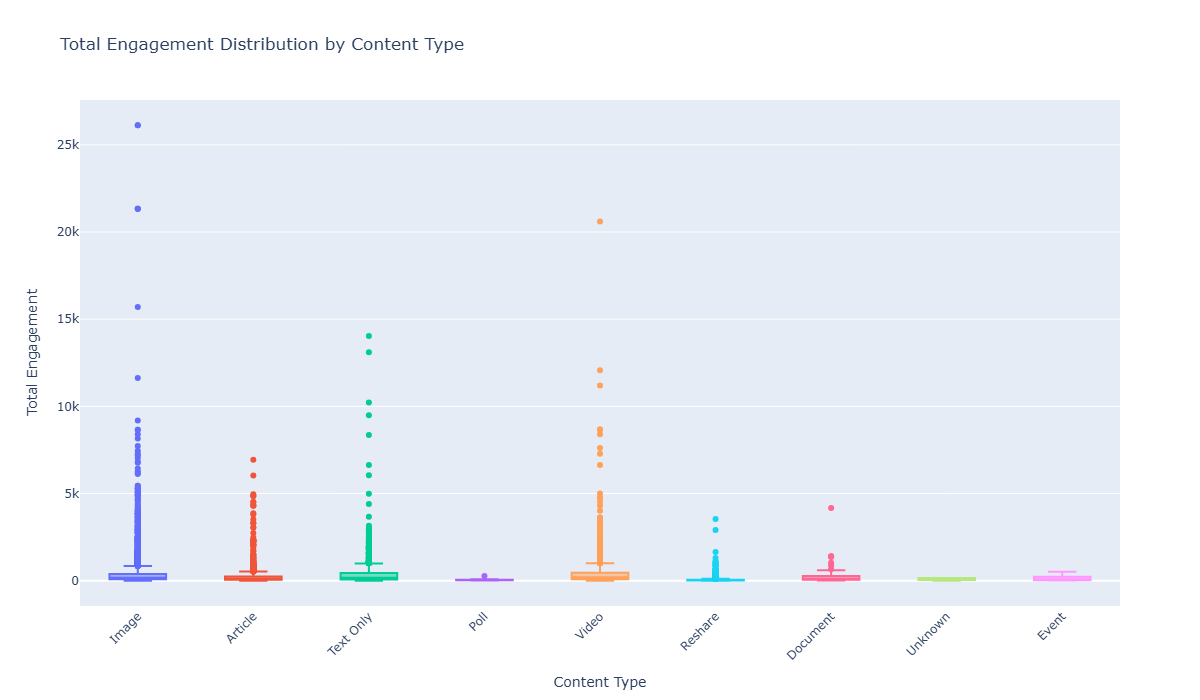

In [17]:
# Box plot of engagement distribution by content type
fig = px.box(
    df,
    x='primary_content_type',
    y='total_engagement',
    title='Total Engagement Distribution by Content Type',
    color='primary_content_type',
    points='outliers',
    hover_data=['authorName', 'numLikes', 'numShares', 'numComments']
)

fig.update_layout(
    xaxis_title='Content Type',
    yaxis_title='Total Engagement',
    height=600,
    xaxis_tickangle=-45,
    showlegend=False
)

fig.show()

# Display static image for GitHub preview
from IPython.display import Image, display
import plotly.io as pio
try:
    img_bytes = pio.to_image(fig, format="png", width=1200, height=700)
    display(Image(img_bytes))
except Exception as e:
    print("Install kaleido: pip install kaleido")
fig.write_html('../output/figures/engagement_distribution_by_content_type.html')

## 6. Text Features Analysis

### 6.1 Post Length Distribution

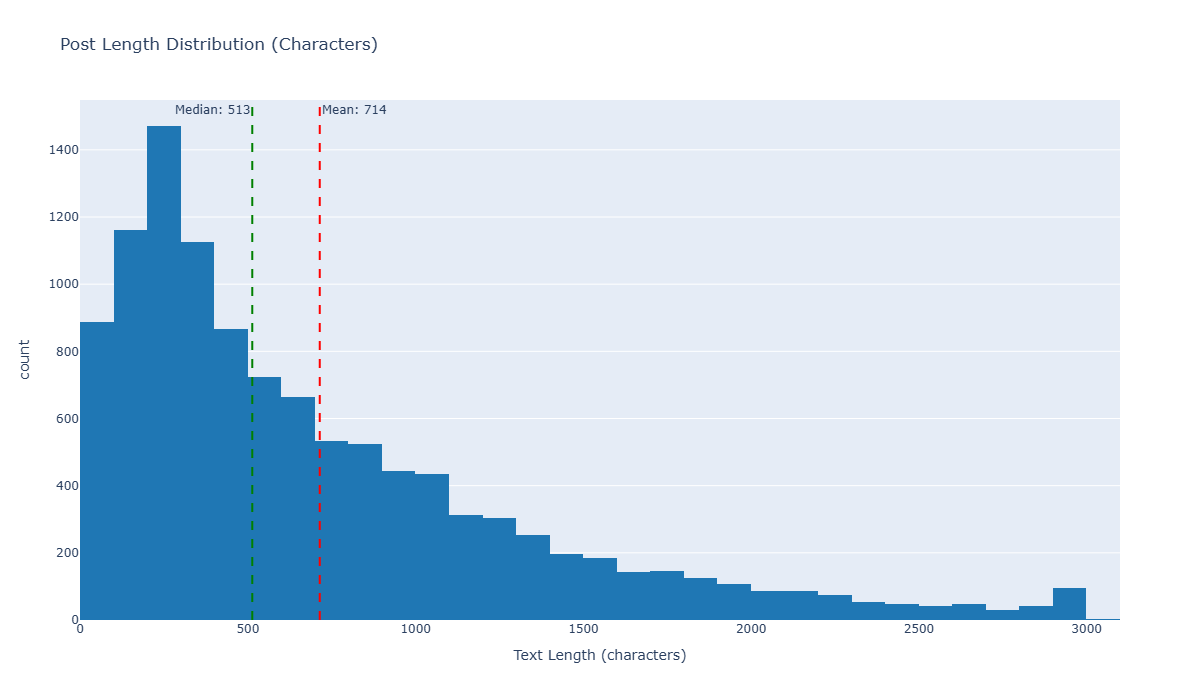

In [18]:
# Post length distribution
fig = px.histogram(
    df,
    x='text_length',
    nbins=50,
    title='Post Length Distribution (Characters)',
    labels={'text_length': 'Text Length (characters)', 'count': 'Number of Posts'},
    color_discrete_sequence=['#1f77b4']
)

fig.add_vline(
    x=df['text_length'].mean(),
    line_dash="dash",
    line_color="red",
    annotation_text=f"Mean: {df['text_length'].mean():.0f}",
    annotation_position="top right"
)

fig.add_vline(
    x=df['text_length'].median(),
    line_dash="dash",
    line_color="green",
    annotation_text=f"Median: {df['text_length'].median():.0f}",
    annotation_position="top left"
)

fig.update_layout(height=500)
fig.show()

# Display static image for GitHub preview
from IPython.display import Image, display
import plotly.io as pio
try:
    img_bytes = pio.to_image(fig, format="png", width=1200, height=700)
    display(Image(img_bytes))
except Exception as e:
    print("Install kaleido: pip install kaleido")
fig.write_html('../output/figures/post_length_distribution.html')

### 6.2 Post Length vs Engagement

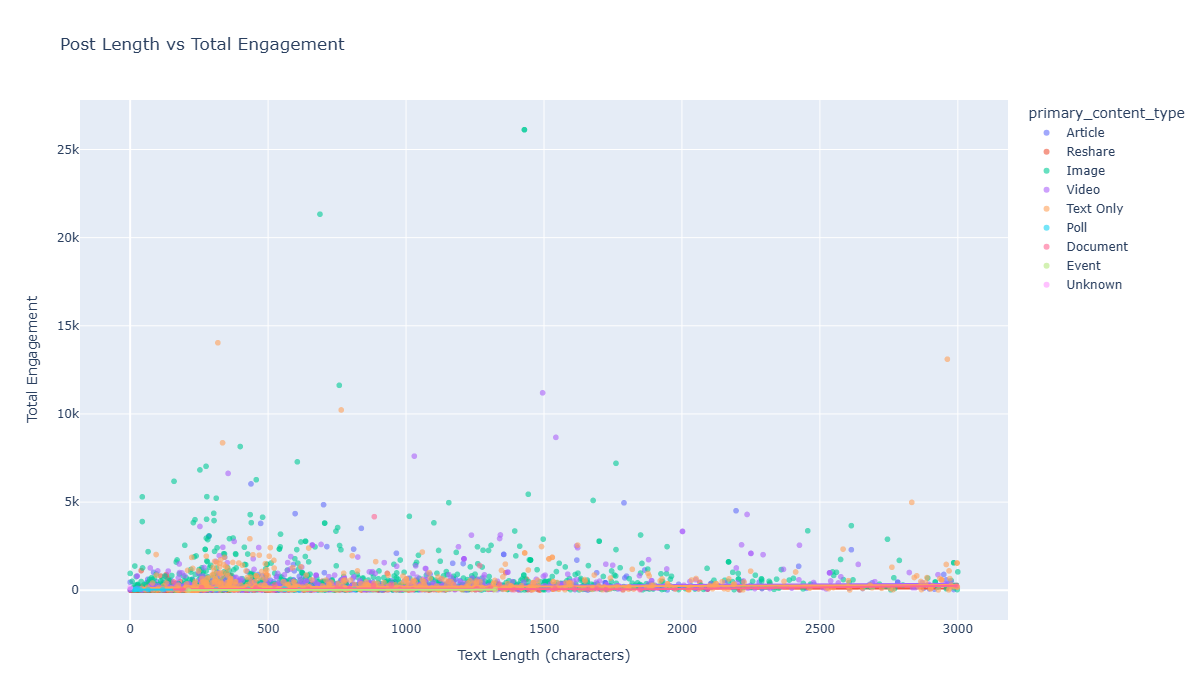

In [19]:
# Scatter plot: Text length vs Total engagement
fig = px.scatter(
    df.sample(min(5000, len(df))),  # Sample for performance
    x='text_length',
    y='total_engagement',
    color='primary_content_type',
    title='Post Length vs Total Engagement',
    labels={'text_length': 'Text Length (characters)', 'total_engagement': 'Total Engagement'},
    hover_data=['authorName', 'numLikes', 'numShares', 'numComments'],
    opacity=0.6,
    trendline='lowess'
)

fig.update_layout(height=600)
fig.show()

# Display static image for GitHub preview
from IPython.display import Image, display
import plotly.io as pio
try:
    img_bytes = pio.to_image(fig, format="png", width=1200, height=700)
    display(Image(img_bytes))
except Exception as e:
    print("Install kaleido: pip install kaleido")
fig.write_html('../output/figures/length_vs_engagement_scatter.html')

In [20]:
# Engagement by length category
length_engagement = df.groupby('length_category').agg({
    'total_engagement': ['mean', 'median', 'count'],
    'numLikes': 'mean',
    'numShares': 'mean',
    'numComments': 'mean'
}).round(2)

length_engagement.columns = ['_'.join(col) for col in length_engagement.columns]
length_engagement = length_engagement.reset_index()

print("\nEngagement by Length Category:")
print(length_engagement.to_string(index=False))

length_engagement.to_csv('../output/tables/engagement_by_length_category.csv', index=False)


Engagement by Length Category:
length_category  total_engagement_mean  total_engagement_median  total_engagement_count  numLikes_mean  numShares_mean  numComments_mean
          Empty                 655.64                    37.00                      14         588.64           13.86             53.14
           Long                 379.94                   160.00                    3005         329.39           19.26             31.28
         Medium                 342.30                   116.00                    3383         304.00           12.40             25.90
          Short                 188.88                    60.00                    2631         171.05            5.42             12.41
      Very Long                 593.80                   273.00                    1320         505.08           27.71             61.02
     Very Short                 101.89                    31.00                     874          92.69            2.67              6.53


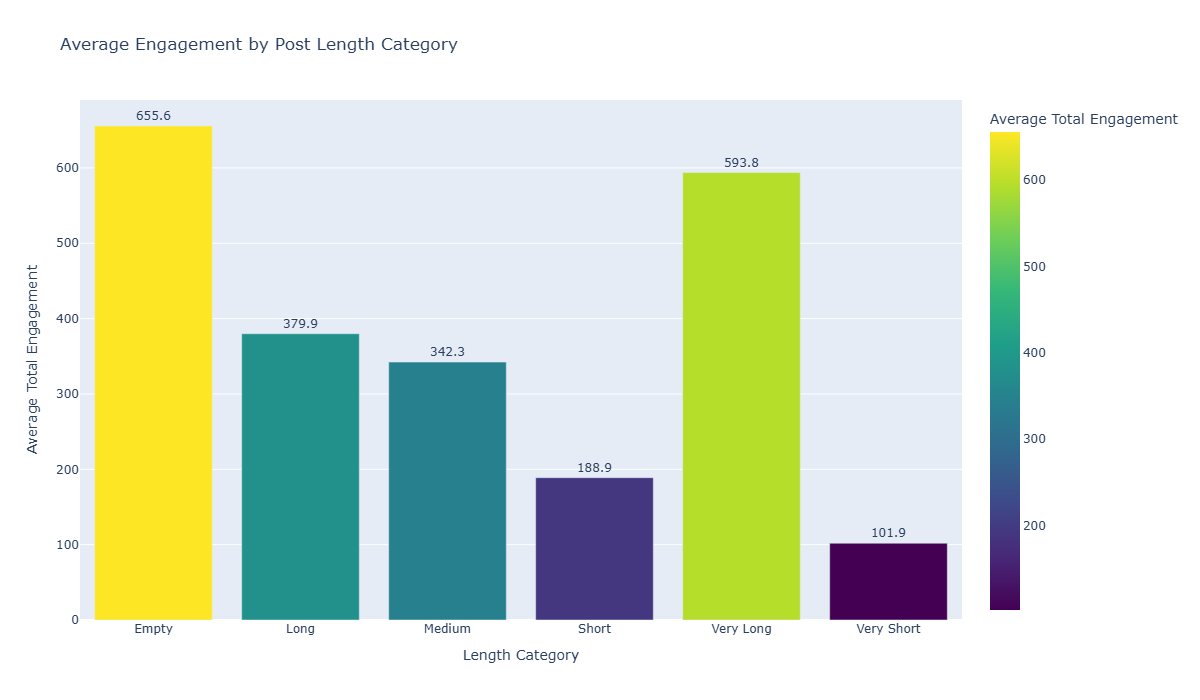

In [21]:
# Bar chart for length categories
fig = px.bar(
    length_engagement,
    x='length_category',
    y='total_engagement_mean',
    title='Average Engagement by Post Length Category',
    labels={'length_category': 'Length Category', 'total_engagement_mean': 'Average Total Engagement'},
    text='total_engagement_mean',
    color='total_engagement_mean',
    color_continuous_scale='Viridis'
)

fig.update_traces(texttemplate='%{text:.1f}', textposition='outside')
fig.update_layout(height=500, showlegend=False)
fig.show()

# Display static image for GitHub preview
from IPython.display import Image, display
import plotly.io as pio
try:
    img_bytes = pio.to_image(fig, format="png", width=1200, height=700)
    display(Image(img_bytes))
except Exception as e:
    print("Install kaleido: pip install kaleido")
fig.write_html('../output/figures/engagement_by_length_category.html')

### 6.3 Text Features Impact

In [22]:
# Compare engagement for posts with/without various text features
text_features = {
    'has_question': 'Question',
    'has_hashtag': 'Hashtag',
    'has_url': 'URL',
    'has_emoji': 'Emoji'
}

comparison_data = []

for feature, label in text_features.items():
    with_feature = df[df[feature] == True]['total_engagement'].mean()
    without_feature = df[df[feature] == False]['total_engagement'].mean()
    
    comparison_data.append({
        'Feature': f'With {label}',
        'Avg Engagement': with_feature,
        'Count': df[df[feature] == True].shape[0]
    })
    
    comparison_data.append({
        'Feature': f'Without {label}',
        'Avg Engagement': without_feature,
        'Count': df[df[feature] == False].shape[0]
    })

comparison_df = pd.DataFrame(comparison_data)
print("\nText Features Impact on Engagement:")
print(comparison_df.to_string(index=False))

comparison_df.to_csv('../output/tables/text_features_impact.csv', index=False)


Text Features Impact on Engagement:
         Feature  Avg Engagement  Count
   With Question          342.58   2149
Without Question          324.14   9078
    With Hashtag          317.62   1902
 Without Hashtag          329.72   9325
        With URL          430.39   2994
     Without URL          290.31   8233
      With Emoji          280.70   3186
   Without Emoji          346.28   8041


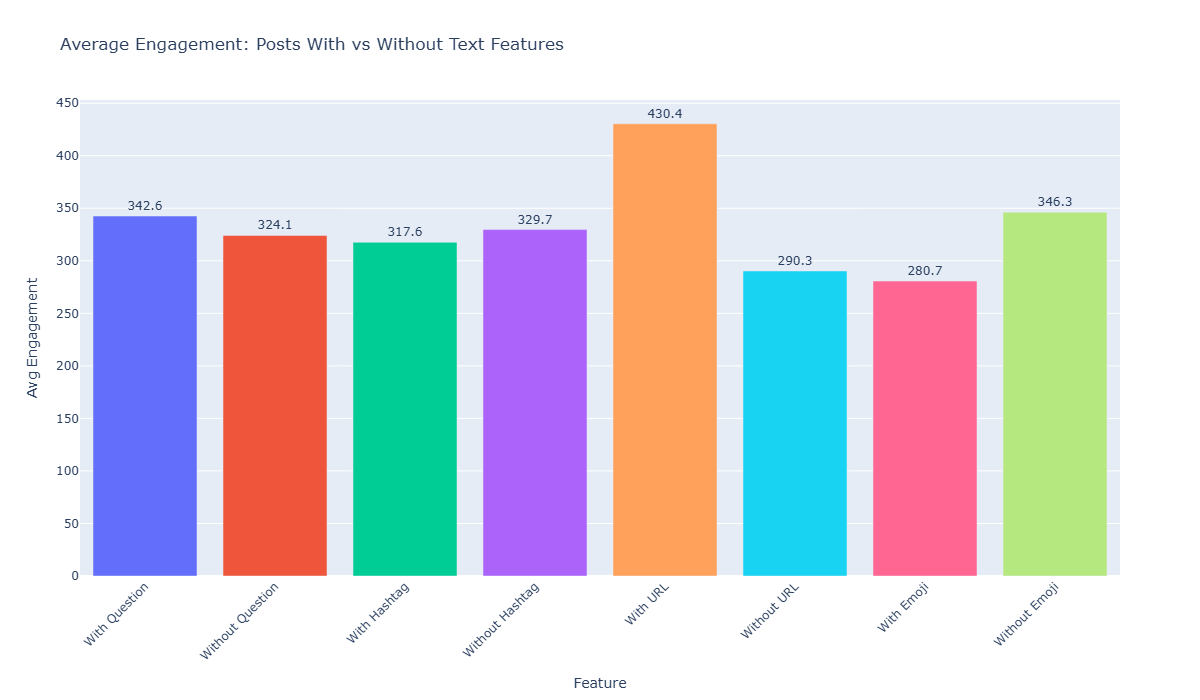

In [23]:
# Visualize text features impact
fig = px.bar(
    comparison_df,
    x='Feature',
    y='Avg Engagement',
    title='Average Engagement: Posts With vs Without Text Features',
    text='Avg Engagement',
    color='Feature',
    hover_data=['Count']
)

fig.update_traces(texttemplate='%{text:.1f}', textposition='outside')
fig.update_layout(height=600, xaxis_tickangle=-45, showlegend=False)
fig.show()

# Display static image for GitHub preview
from IPython.display import Image, display
import plotly.io as pio
try:
    img_bytes = pio.to_image(fig, format="png", width=1200, height=700)
    display(Image(img_bytes))
except Exception as e:
    print("Install kaleido: pip install kaleido")
fig.write_html('../output/figures/text_features_impact.html')

## 7. Author Analysis

### 7.1 Top Authors by Engagement

In [24]:
# Top 20 authors by total engagement
top_authors = df.groupby('authorName').agg({
    'total_engagement': 'sum',
    'numLikes': 'sum',
    'numShares': 'sum',
    'numComments': 'sum',
    'urn': 'count',
    'authorFollowersCount': 'first'
}).round(0)

top_authors.columns = ['Total_Engagement', 'Total_Likes', 'Total_Shares', 'Total_Comments', 'Post_Count', 'Followers']
top_authors['Avg_Engagement_Per_Post'] = (top_authors['Total_Engagement'] / top_authors['Post_Count']).round(2)
top_authors = top_authors.sort_values('Total_Engagement', ascending=False).head(20)

print("Top 20 Authors by Total Engagement:")
print(top_authors)

top_authors.to_csv('../output/tables/top_20_authors.csv')

Top 20 Authors by Total Engagement:
                     Total_Engagement  Total_Likes  Total_Shares  \
authorName                                                         
Deedy Das                      382681       359788          7058   
Harry Stebbings                262668       232541          3673   
Reid Hoffman                   144676       119759          7670   
Jordan Mazer                   131120       108899          9173   
Anthropic                      122807       110165          7842   
Andreessen Horowitz             92458        83313          5987   
Mistral AI                      73665        68936          2912   
Itamar Novick                   71345        53994          2015   
Andrew Chen                     61989        50560          3174   
Sri Kosuri                      52240        41370          8470   
Arif Janmohamed                 51522        43071          2143   
Jonathan Lai                    38271        31976           999   
Tim Draper  

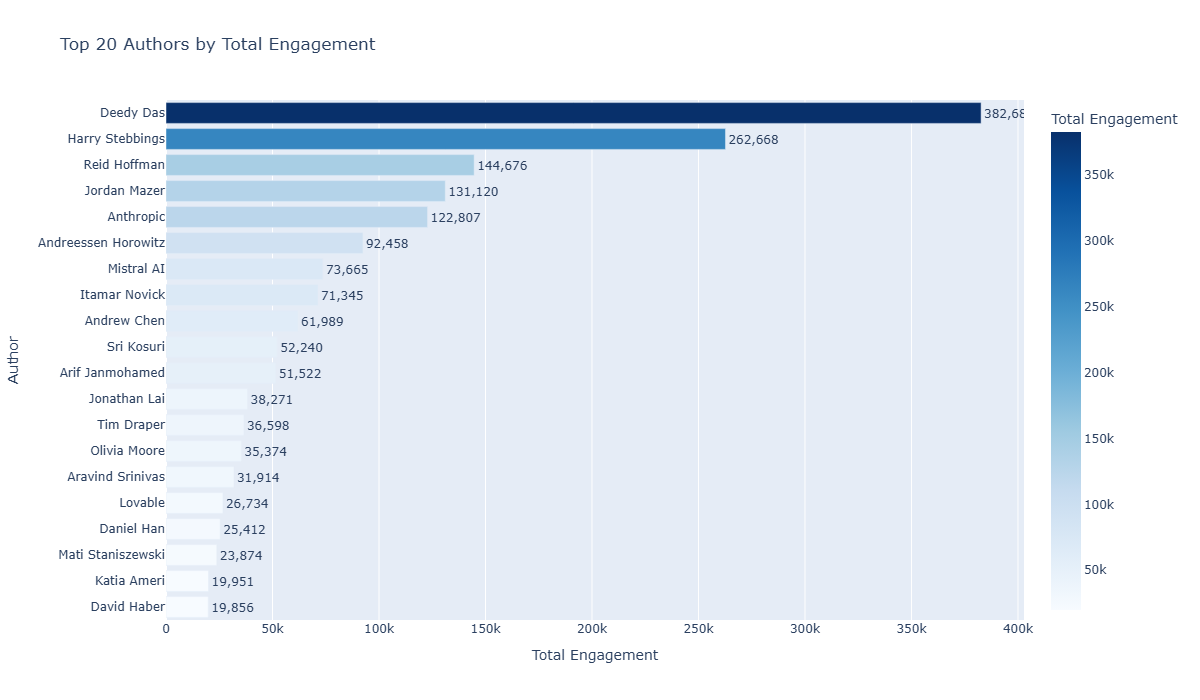

In [25]:
# Visualize top authors
top_authors_plot = top_authors.head(20).reset_index()

fig = px.bar(
    top_authors_plot,
    x='Total_Engagement',
    y='authorName',
    orientation='h',
    title='Top 20 Authors by Total Engagement',
    labels={'Total_Engagement': 'Total Engagement', 'authorName': 'Author'},
    text='Total_Engagement',
    color='Total_Engagement',
    color_continuous_scale='Blues',
    hover_data=['Post_Count', 'Avg_Engagement_Per_Post']
)

fig.update_traces(texttemplate='%{text:,.0f}', textposition='outside')
fig.update_layout(height=700, showlegend=False)
fig.update_yaxes(categoryorder='total ascending')
fig.show()

# Display static image for GitHub preview
from IPython.display import Image, display
import plotly.io as pio
try:
    img_bytes = pio.to_image(fig, format="png", width=1200, height=700)
    display(Image(img_bytes))
except Exception as e:
    print("Install kaleido: pip install kaleido")
fig.write_html('../output/figures/top_20_authors.html')

### 7.2 Posts per Author Distribution

Total unique authors: 1829
Average posts per author: 6.14
Median posts per author: 1
Max posts by single author: 568


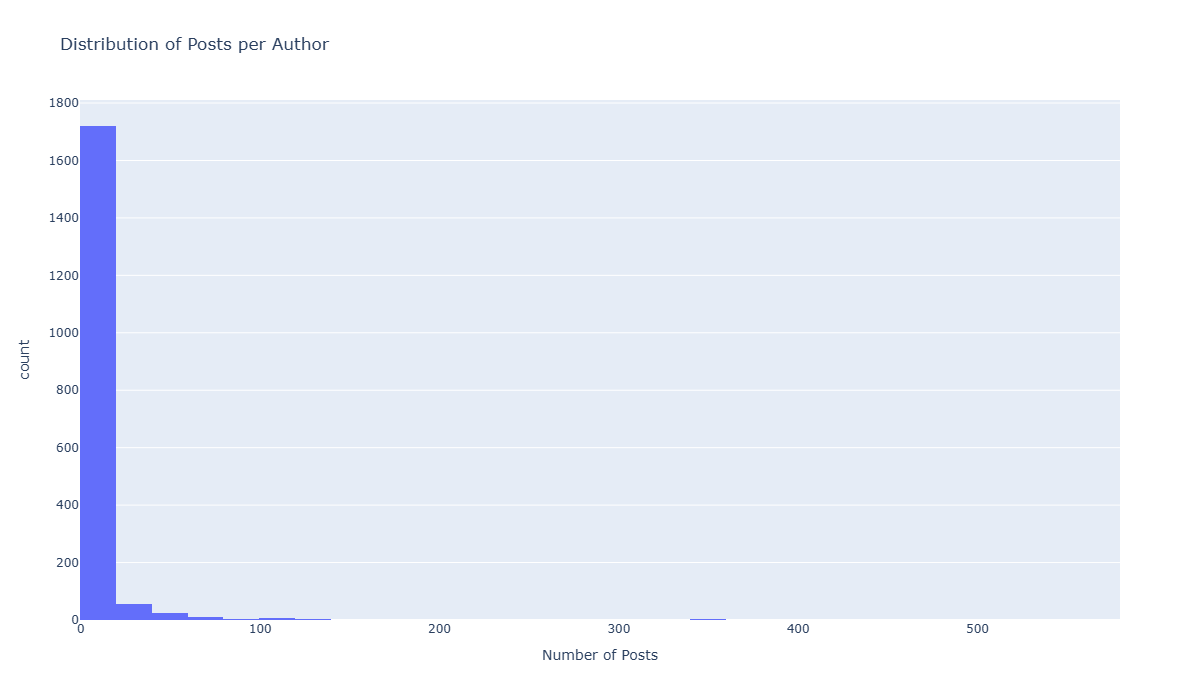

In [26]:
# Posts per author distribution
posts_per_author = df.groupby('authorName').size().reset_index(name='post_count')

print(f"Total unique authors: {len(posts_per_author)}")
print(f"Average posts per author: {posts_per_author['post_count'].mean():.2f}")
print(f"Median posts per author: {posts_per_author['post_count'].median():.0f}")
print(f"Max posts by single author: {posts_per_author['post_count'].max()}")

# Histogram of posts per author
fig = px.histogram(
    posts_per_author,
    x='post_count',
    nbins=50,
    title='Distribution of Posts per Author',
    labels={'post_count': 'Number of Posts', 'count': 'Number of Authors'}
)

fig.update_layout(height=500)
fig.show()

# Display static image for GitHub preview
from IPython.display import Image, display
import plotly.io as pio
try:
    img_bytes = pio.to_image(fig, format="png", width=1200, height=700)
    display(Image(img_bytes))
except Exception as e:
    print("Install kaleido: pip install kaleido")
fig.write_html('../output/figures/posts_per_author_distribution.html')

### 7.3 Follower Count Analysis (if available)


Posts with follower count data: 1146 (10.2%)
Min followers: 34
Max followers: 19,371,999
Mean followers: 256,474
Median followers: 29,949


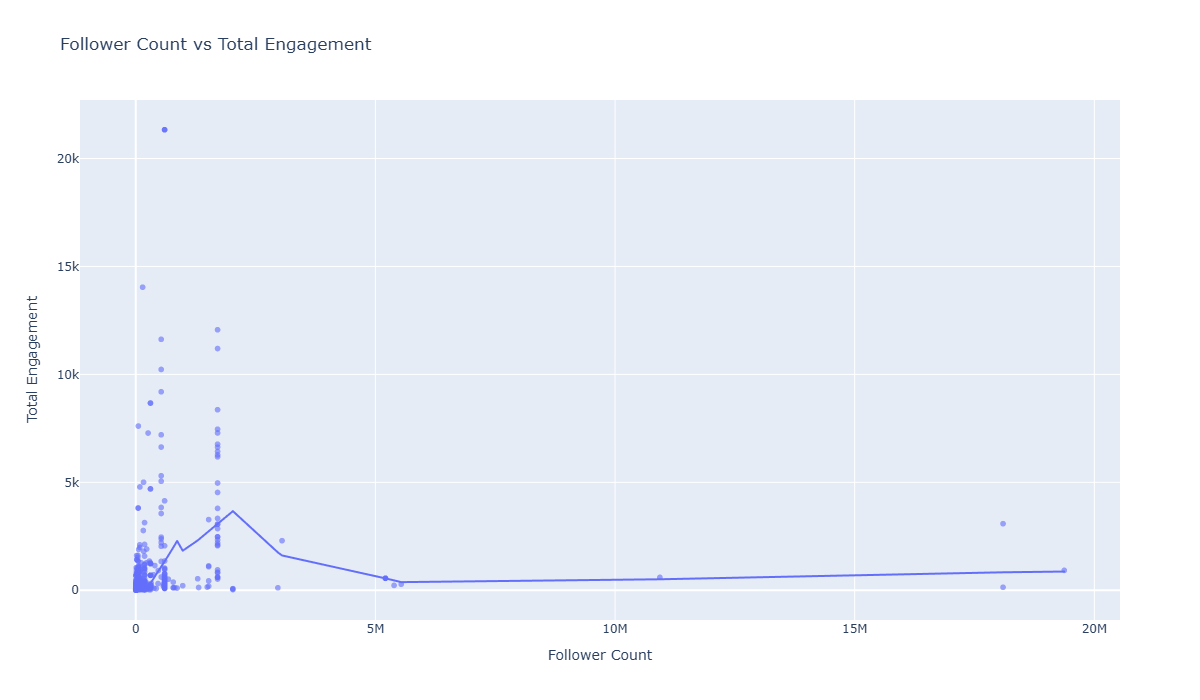


Insufficient follower count data for analysis (1146 posts)


In [27]:
# Analyze follower count data
follower_data = df[df['authorFollowersCount'].notna()]

if len(follower_data) > 100:
    print(f"\nPosts with follower count data: {len(follower_data)} ({len(follower_data)/len(df)*100:.1f}%)")
    print(f"Min followers: {follower_data['authorFollowersCount'].min():,.0f}")
    print(f"Max followers: {follower_data['authorFollowersCount'].max():,.0f}")
    print(f"Mean followers: {follower_data['authorFollowersCount'].mean():,.0f}")
    print(f"Median followers: {follower_data['authorFollowersCount'].median():,.0f}")
    
    # Scatter plot: Followers vs Engagement
    fig = px.scatter(
        follower_data.sample(min(2000, len(follower_data))),
        x='authorFollowersCount',
        y='total_engagement',
        title='Follower Count vs Total Engagement',
        labels={'authorFollowersCount': 'Follower Count', 'total_engagement': 'Total Engagement'},
        hover_data=['authorName', 'numLikes', 'numShares', 'numComments'],
        opacity=0.6,
        trendline='lowess'
    )
    
    fig.update_layout(height=600)
    fig.show()

# Display static image for GitHub preview
from IPython.display import Image, display
import plotly.io as pio
try:
    img_bytes = pio.to_image(fig, format="png", width=1200, height=700)
    display(Image(img_bytes))
except Exception as e:
    print("Install kaleido: pip install kaleido")
    fig.write_html('../output/figures/followers_vs_engagement.html')
else:
    print(f"\nInsufficient follower count data for analysis ({len(follower_data)} posts)")

## 8. Temporal Analysis Overview

### 8.1 Posts Over Time

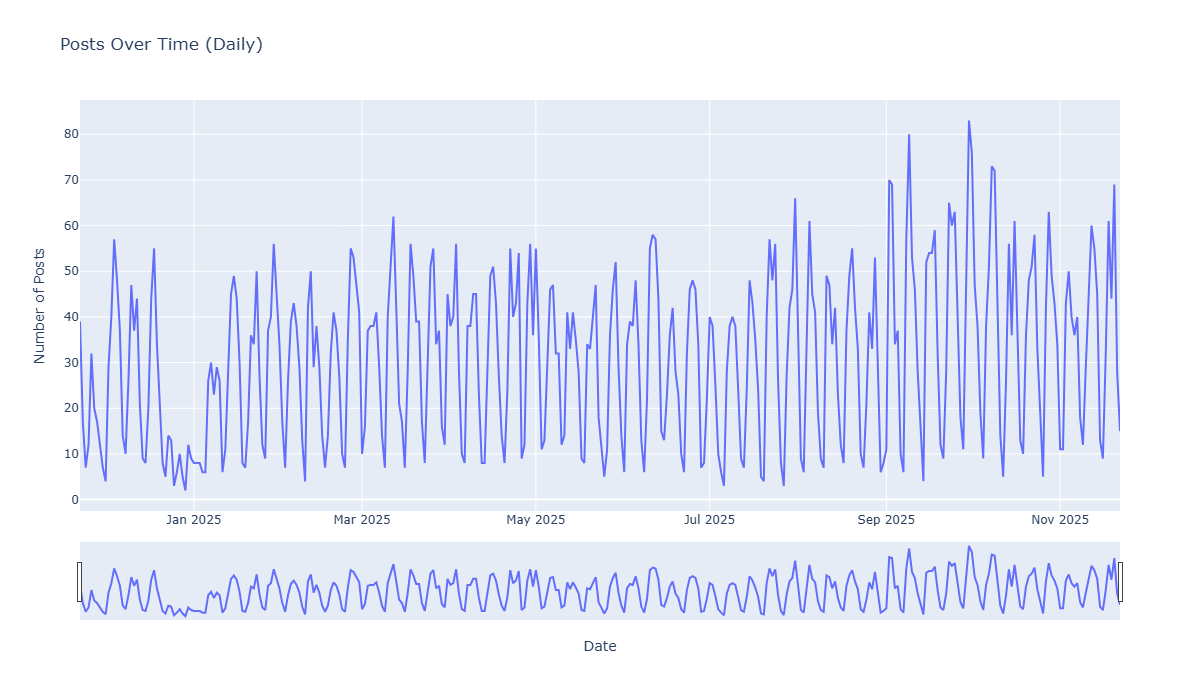

In [28]:
# Posts over time (daily)
df['post_date'] = df['postedAt'].dt.date
posts_over_time = df.groupby('post_date').size().reset_index(name='post_count')
posts_over_time['post_date'] = pd.to_datetime(posts_over_time['post_date'])

fig = px.line(
    posts_over_time,
    x='post_date',
    y='post_count',
    title='Posts Over Time (Daily)',
    labels={'post_date': 'Date', 'post_count': 'Number of Posts'}
)

fig.update_xaxes(rangeslider_visible=True)
fig.update_layout(height=500)
fig.show()

# Display static image for GitHub preview
from IPython.display import Image, display
import plotly.io as pio
try:
    img_bytes = pio.to_image(fig, format="png", width=1200, height=700)
    display(Image(img_bytes))
except Exception as e:
    print("Install kaleido: pip install kaleido")
fig.write_html('../output/figures/posts_over_time.html')

### 8.2 Posting Patterns by Day and Hour

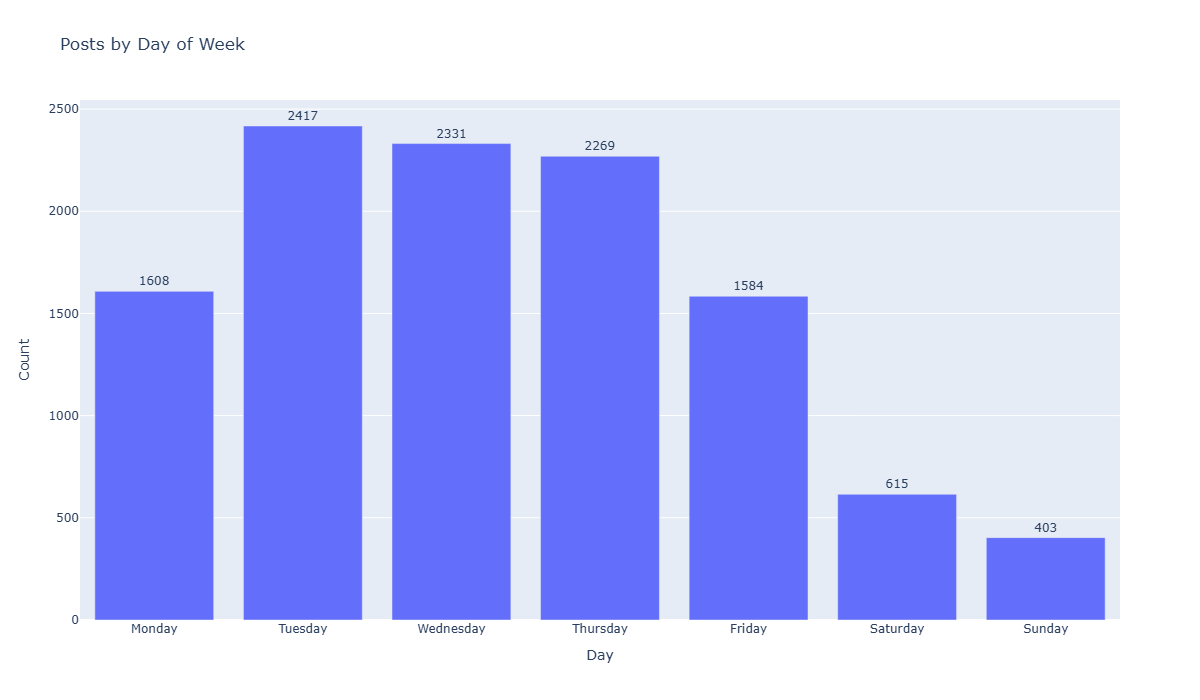

In [29]:
# Posts by day of week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
posts_by_day = df['post_dayname'].value_counts().reindex(day_order).reset_index()
posts_by_day.columns = ['Day', 'Count']

fig = px.bar(
    posts_by_day,
    x='Day',
    y='Count',
    title='Posts by Day of Week',
    text='Count',
    color_continuous_scale='Blues'
)

fig.update_traces(textposition='outside')
fig.update_layout(height=500, showlegend=False)
fig.show()

# Display static image for GitHub preview
from IPython.display import Image, display
import plotly.io as pio
try:
    img_bytes = pio.to_image(fig, format="png", width=1200, height=700)
    display(Image(img_bytes))
except Exception as e:
    print("Install kaleido: pip install kaleido")
fig.write_html('../output/figures/posts_by_day_of_week.html')

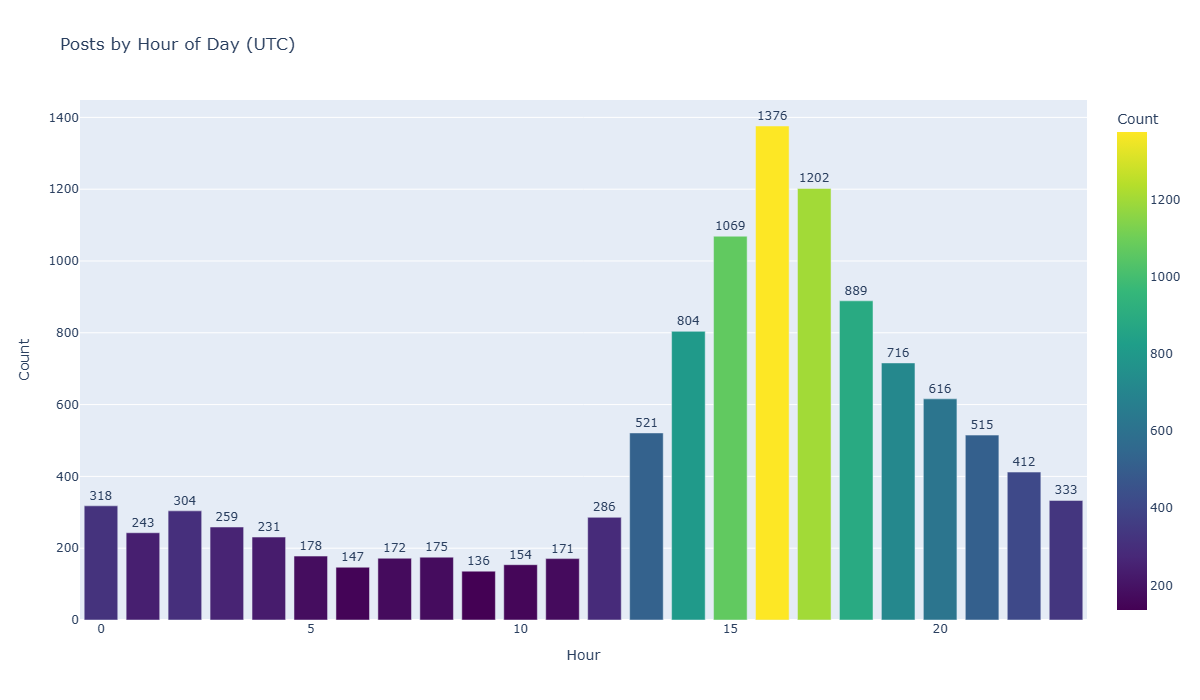

In [30]:
# Posts by hour of day
posts_by_hour = df['post_hour'].value_counts().sort_index().reset_index()
posts_by_hour.columns = ['Hour', 'Count']

fig = px.bar(
    posts_by_hour,
    x='Hour',
    y='Count',
    title='Posts by Hour of Day (UTC)',
    text='Count',
    color='Count',
    color_continuous_scale='Viridis'
)

fig.update_traces(textposition='outside')
fig.update_layout(height=500, showlegend=False)
fig.show()

# Display static image for GitHub preview
from IPython.display import Image, display
import plotly.io as pio
try:
    img_bytes = pio.to_image(fig, format="png", width=1200, height=700)
    display(Image(img_bytes))
except Exception as e:
    print("Install kaleido: pip install kaleido")
fig.write_html('../output/figures/posts_by_hour.html')

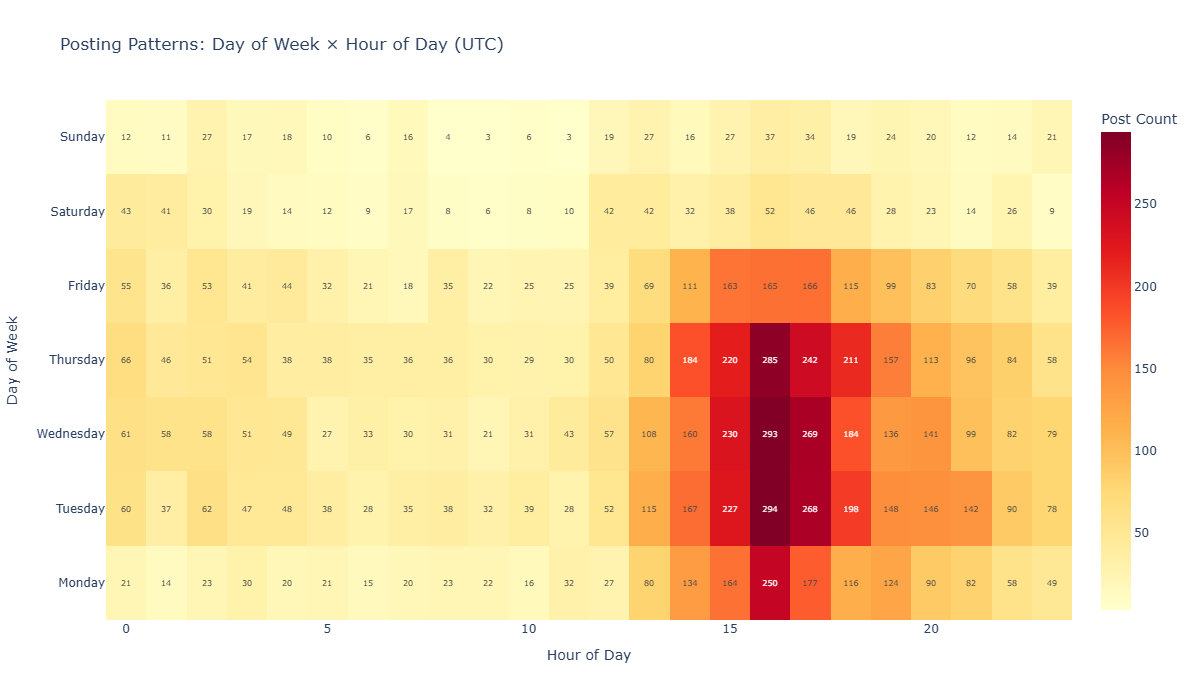

In [31]:
# Heatmap: Day of week × Hour of day
heatmap_data = df.groupby(['post_dayname', 'post_hour']).size().reset_index(name='count')
heatmap_pivot = heatmap_data.pivot(index='post_dayname', columns='post_hour', values='count').fillna(0)
heatmap_pivot = heatmap_pivot.reindex(day_order)

fig = go.Figure(data=go.Heatmap(
    z=heatmap_pivot.values,
    x=heatmap_pivot.columns,
    y=heatmap_pivot.index,
    colorscale='YlOrRd',
    text=heatmap_pivot.values,
    texttemplate='%{text:.0f}',
    textfont={"size": 8},
    colorbar=dict(title="Post Count")
))

fig.update_layout(
    title='Posting Patterns: Day of Week × Hour of Day (UTC)',
    xaxis_title='Hour of Day',
    yaxis_title='Day of Week',
    height=500
)

fig.show()

# Display static image for GitHub preview
from IPython.display import Image, display
import plotly.io as pio
try:
    img_bytes = pio.to_image(fig, format="png", width=1200, height=700)
    display(Image(img_bytes))
except Exception as e:
    print("Install kaleido: pip install kaleido")
fig.write_html('../output/figures/posting_heatmap.html')

### 8.3 Time of Day Analysis

In [32]:
# Posts and engagement by time of day
time_of_day_stats = df.groupby('time_of_day').agg({
    'urn': 'count',
    'total_engagement': ['mean', 'median', 'sum']
}).round(2)

time_of_day_stats.columns = ['post_count', 'avg_engagement', 'median_engagement', 'total_engagement']
time_of_day_stats = time_of_day_stats.reset_index()

print("\nEngagement by Time of Day:")
print(time_of_day_stats.to_string(index=False))

time_of_day_stats.to_csv('../output/tables/engagement_by_time_of_day.csv', index=False)


Engagement by Time of Day:
    time_of_day  post_count  avg_engagement  median_engagement  total_engagement
Afternoon (UTC)        5258          325.71             127.00           1712580
  Evening (UTC)        2736          312.31              98.00            854468
  Morning (UTC)         955          370.76             124.00            354075
    Night (UTC)        2278          332.57             107.50            757596


## 9. Key Insights Summary

In [33]:
# Compile key insights
print("="*70)
print("KEY INSIGHTS FROM EXPLORATORY ANALYSIS")
print("="*70)

insights = []

# 1. Content type with highest engagement
best_content = content_engagement['total_engagement_mean'].idxmax()
best_content_eng = content_engagement.loc[best_content, 'total_engagement_mean']
insights.append(f"1. Best Content Type: {best_content} (Avg engagement: {best_content_eng:.1f})")

# 2. Optimal length category
best_length = length_engagement.loc[length_engagement['total_engagement_mean'].idxmax(), 'length_category']
best_length_eng = length_engagement['total_engagement_mean'].max()
insights.append(f"2. Optimal Post Length: {best_length} (Avg engagement: {best_length_eng:.1f})")

# 3. Text features impact
for feature, label in text_features.items():
    with_feature = df[df[feature] == True]['total_engagement'].mean()
    without_feature = df[df[feature] == False]['total_engagement'].mean()
    diff_pct = ((with_feature - without_feature) / without_feature * 100)
    if abs(diff_pct) > 5:
        direction = "higher" if diff_pct > 0 else "lower"
        insights.append(f"   - Posts with {label}s have {abs(diff_pct):.1f}% {direction} engagement")

# 4. Most active day
most_active_day = posts_by_day.loc[posts_by_day['Count'].idxmax(), 'Day']
insights.append(f"3. Most Active Posting Day: {most_active_day}")

# 5. Most active hour
most_active_hour = posts_by_hour.loc[posts_by_hour['Count'].idxmax(), 'Hour']
insights.append(f"4. Most Active Posting Hour: {most_active_hour}:00")

# 6. Engagement distribution
median_eng = df['total_engagement'].median()
mean_eng = df['total_engagement'].mean()
insights.append(f"5. Engagement Distribution: Highly skewed (Mean: {mean_eng:.1f}, Median: {median_eng:.1f})")

# 7. Top author dominance
top_author_name = top_authors.index[0]
top_author_posts = top_authors.iloc[0]['Post_Count']
top_author_eng = top_authors.iloc[0]['Total_Engagement']
insights.append(f"6. Top Author: {top_author_name} ({top_author_posts:.0f} posts, {top_author_eng:.0f} total engagement)")

for insight in insights:
    print(insight)

print("="*70)

# Save insights
with open('../output/tables/key_insights_eda.txt', 'w') as f:
    f.write("KEY INSIGHTS FROM EXPLORATORY ANALYSIS\n")
    f.write("="*70 + "\n")
    for insight in insights:
        f.write(insight + "\n")

KEY INSIGHTS FROM EXPLORATORY ANALYSIS
1. Best Content Type: Video (Avg engagement: 461.2)
2. Optimal Post Length: Empty (Avg engagement: 655.6)
   - Posts with Questions have 5.7% higher engagement
   - Posts with URLs have 48.3% higher engagement
   - Posts with Emojis have 18.9% lower engagement
3. Most Active Posting Day: Tuesday
4. Most Active Posting Hour: 16:00
5. Engagement Distribution: Highly skewed (Mean: 327.7, Median: 115.0)
6. Top Author: Deedy Das (568 posts, 382681 total engagement)
